<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Webscraping in Python</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Why and how to get your own datasets from webpages</h4>
</div>
<br>

In this notebook, we are going to learn how to webscrape in Python. For this, we are going to use the fake website https://books.toscrape.com/.
This website contains informations about books for example their categories, prices and rankings.

<h3> Structure </h3>

1. Motivation: Why do we need to webscrape?


2. Types of web accesses

    2.1 Web Pages
    
    2.2 API

3. Structure of HTML-web pages


4. Different packages to access web pages in Python

    4.1 urllib
    
    4.2 Requests
    
    4.3 Beautiful Soup


5. Building a web crawler - Example

    5.1 Cook-Book

    5.2 Defining headers and user agents
    
    5.3 Selecting/Filtering for the required data
    

6. Exception handeling

    
(7. Logging)


8. Best practices

<h3> 1 Motivation </h3>

So far, we worked with datasets that were provided for us to work with (i.e. json, csv, xlsx etc.). This is not always the case. 

Especially for Social Science, a lot of relevant information and datasets are publically on the internet (i.e social media data, newspapers, websites, ...)
If these websites don't provide options to download the data in ready-made files, we have to acces them either through an API or we need to scrape the website. 
This way, we are also more flexible to collect all data relevant for us and in a format suitable for our application.


This is what we are going to learn in this notebook.

<h3> 2 Types of web accesses </h3>

<h4> 2.1 Web pages </h4>


Of course, when trying to get information and data from the internet, one option is to access the specified website and run a code that scrapes the information from the internet, based on the underlaying HTML-structure (or other markup language) of the web page. 
However, if the layout of the website changes (the HTML sturcture) it could happen that the written code won't work anymore. 
Additionally, webscraping can involve a lot of effort and time, since you may need to clean and structure the scraped information into a usable format.
Here, APIs can be a solution.


<h4> 2.2 API </h4>

An API (Application Programming Interface) is, as the name states, an interface that enables the exchange of information and data between two agents (i.e. a website or database and a user). The API itself is not the instance, that contains the data, but purely for the communication between the two sides, that want to exchange data. APIs therefore provide a standardised way of accessing the data and enable fast and efficient exchange, independant of whether the websites layout or data base structure changes of not. 

One usecases could be:
- A company can use APIs to keep track of the stock of the products they sell. Their warehouse probably has an own, internal database sytem to report the stocks and the companies website uses an API to get the current information from the warehouse about the stock. Even if the warehouses database structure changes, the website still reports the right availabilities.



<h3> 3 HTML web pages </h3>

HTML is the abbreviation for 'Hyptertext Markup Language'. It is the language used to code websites, meaning their structure and content.

There are two main HTML-components, which are of interest for us: __Tags and Attributes__.

- Tags: 
    Tags are the different types of HTML elements, each serving an own purpose (like headers, paragraphs, tables, images, links etc.). Usually, they are defined in angle brackets. 
    
- Attributes:
    Attributes are additional information for elements. They can help us to identify the specific elements, we are interested in. 

In the GitHub folder, we pusblished an easy html-code for a website. The underlying HTML-code looks the following

![title](source/ICSS_website_HTML.png)

You can see the different possible tags and attributes:

**Tags:** (the blue parts)
- `<head>`
    Document head with metadata
    
- `<body>`
    Document body including displayed content
    
- `<a>`
    Hyperlik (anchor)
    
- `<div>`
    Container/sections in the document
    
- `<h1>` - `<h6>`
    Headers (in decreasing order)
    
- `<img>`
    Images
    
- `<input>`
    Input filed
    
- `<ol>`,  `<ul>`, `<li>`
    Numbered (ordered) and bulletpoint (unordered) lists of items
    
- `<p>`
    Paragraphs
    
- `<table>`, `<thead>`, `<tbody>`, `<tr>`, `<td>`
    Tables with header and body, composed of rows with cells
    
- `<main>`

**Attributes:** (the pink parts)

- `href`
    URL link in an \<a> tag (anchor)
    
- `class`
    Define classes for elements to conceptually connect/distingusih them to other elemets
    
- `id`
    Unique identifier
    
- `src`
    Source of a media element like an image

- `style`
    The appearance of the text
    
- `value`
    Value of an element

All websites online have an underlying HTML code which you can view and investigate when clicking the mouse right hand side and selecting "Investigate" or `CTRL` + `SHIFT` + `C` (Windows) respectively `COMMAND` + `SHIFT` + `C` (Mac).

- The [Wikipedia overview](https://en.wikipedia.org/wiki/Main_Page) page has different tiles with informations about what happened today, what has happend on todays date in history etc.
- The [Wikipedia University of Constance](https://en.wikipedia.org/wiki/University_of_Konstanz) webpage has a hierarchy of headlines and subheaders after which there is written text.
- The [Books to Scrape](https://books.toscrape.com/) website has the different books you can purchase ordered in a grid with liked subpages. 

By clicking on a specific element and investigating it you get information about the location in the HTML code where this element (header, table-value, sublink) is stored. Understanding this structure/pattern enables you to later access the HTML-code of a webpage using the URL and searching/filtering for the element/module that contains the data of interest.


<h3> 4 Packages used for webscraping in Python </h3>

<h4> 4.1 Urllib </h4>

[Urllib](https://docs.python.org/3/library/urllib.html) is a package designed to work with URLs in Python. You can request these URLs, add headers (identification of browsers through User-Agents) or handle exceptions. This is the standard Python library for URLs.

- `urllib.request`
- `urllib.error`
- `urllib.parse`

<h4> 4.2 Requests </h4>

[Requests](https://requests.readthedocs.io/en/latest/) is another module to work with URLs. Again, you can request websites, define user-agents and handle exceptions. Compared to urllib, requests has automatical decoding/encoding and more extensive functions and exception classes. 

Therefore, we are going to work with requests.

<h4> 4.3 Beautiful Soup </h4>

[BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/) is a python package developed for filtering/selecting the information of interest from HTML-files. 

<h3> 5 Building a webcrawler in Python </h3>

When building a webcrawler to scrap information, we always follow a certain cook-book of steps:

- First, we **send a request** to the url in oder to **receive a response**
- This response contains information about the request i.e. the **status** of our request (did it succeed or failed), but of course also the **content** of the page we requested
    - Common status codes:
        - 200: success
        - 301: permanent redirect
        - 303: redirect
        - 400: bad request
        - 401: unauthorized
        - 404: not exists
        - 500: internal server error
    - The **content** of the response is the actual HTML-file, which we now want to **filter for the desired information/data** (using the HTML-tags and attributes). 

Before starting to build the scraper, we should think about the structure, it is supposed to have. This depends on
- Which information do we need to extract?
- Where/How can we access this in our HTML-file?
- How can we write a function to do this?
- In which way to we want to store and save our aquired data?

<h4> 5.1 Accessing our first website </h4>

Before we can start, we need to install and import the required packages:

In [66]:
#!pip install beautifulsoup4
#!pip install requests

from bs4 import BeautifulSoup
import requests
import pandas as pd

**Step 1: URL**

URL (uniform resource locators) are references to all kinds of web resources (like webpages). 

In [4]:
# We define the URL we want to access

url = 'https://en.wikipedia.org/wiki/University_of_Konstanz'

**Step 2: Send the Request**

Using the command `requests.get(url)`, we send the request for the specified URL.
What we get back, is the response (stored in the variable response).

In [5]:
# Sending a request to the URL. What we get is the response.

response = requests.get(url)

In [6]:
# Having a look at the response. The status code 200 indicated a successful response. 
# A code with 400/405 is an error (see later).

print(response)
print(response.status_code)

<Response [200]>
200


In [7]:
## The pure response content (the HTML-file) is quiet messy...

response.content

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>University of Konstanz - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientp

**Step 3: Parsing**

The response content is still written in HTML-language. 
In order to easier navigate, search or modify the information, we should parse (preprocess) it. 

In [8]:
# Parsing the content into a structured format, so that we can proberly read and work with it

soup = BeautifulSoup(response.content, 'html.parser')

In [9]:
# Having a look at the (prettified) object

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   University of Konstanz - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-w

Now, the resulting soup-object is a lot easier to read as it is strutured with linebreaks and indents.
We can now search/filter for the categories/objects, we are interested in (our desired data).

Before doing so, we should have a look at common errors, that could arise during accessing the url.

<h4> 5.2 Defining headers and user agents </h4>

Of course, website designers are aware that people might try to scrape information from their page and can try to prevent/restrict this (because it is a lot of requests in a short amount of time: servercapacity). They can, for example, require that pages can only be accessed by a computers web-browser. If we would try to access the webpage from a python script (i.e. through a Jupyter Notebook or Visual Studio Code), the webpage would detect us as a non-bowser and deny the access.


Often, a solution to this problem is to specify a user agent, Python is supposed to use when accessing the webpage.
Such a user agent string contains information on the browser being used, the operating system or the different versions and enables a website to provide a suitable format.

Specifying and using such a user agent, we can hide that accessing the webpage actually happens out of Python (for scraping-purposes).

In Firefox you can use the URL `about:support` to find a table which contains the user-agent. 
In Google-Chrome type `chrome://version` into the url field, to find the information.
Other than that, there are several websites, which read and return you agent, i.e. [here](http://wieistmeinuseragent.de/).

In [10]:
## Example code which fails due to missing user agent
url = 'https://us.soccerway.com/international/world/world-cup/2022-qatar/group-stage/r49519/'

resp = requests.get(url)

print("Response status code: " + str(resp.status_code))

# And saving the content in a soup object
soup = BeautifulSoup(resp.content, 'html.parser')
soup

Response status code: 403


<html><head>
<title>Access Denied</title>
</head><body>
<h1>Access Denied</h1>
 
You don't have permission to access "http://us.soccerway.com/international/world/world-cup/2022-qatar/group-stage/r49519/" on this server.<p>
Reference #18.9d5e6cc1.1730728514.7a59fe2
<p>https://errors.edgesuite.net/18.9d5e6cc1.1730728514.7a59fe2</p>
</p></body>
</html>

In [12]:
## Example code accessing the same page using a user agent

url = 'https://us.soccerway.com/international/world/world-cup/2022-qatar/group-stage/r49519/'
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:131.0) Gecko/20100101 Firefox/131.0"}

## Adding the parameter headers, which we just defined
resp = requests.get(url, headers = headers)

print("Response status code: " + str(resp.status_code))

# And saving the content in a soup object
soup = BeautifulSoup(resp.content, 'html.parser')
soup

Response status code: 200


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Summary - FIFA World Cup - World - Results, fixtures, tables and news - Soccerway</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="Summary - FIFA World Cup - World - Results, fixtures, tables and news - Soccerway" name="description">
<meta content="YZMe1orngFPI/VHY1nG15dA7JJApmh8u0hkegWp64g8=" name="verify-v1"/>
<meta content="njeQixLcgBgQ9UllN0-IbVYAz1M" name="alexaVerifyID"/>
<meta content="app-id=445839722" name="apple-itunes-app"/>
<link href="https://us.soccerway.com/international/world/world-cup/2022-qatar/group-stage/r49519/" rel="canonical"/>
<link href="https://id.soccerway.com/international/world/world-cup/2022-qatar/group-stage/r49519/" hreflang="id-ID" rel="alternate"/>
<link href="https://cn.soccerway.com/international/world/world-cup/2022-qatar/group-stage/r49519/" hreflang="zh-CN" rel="alternate"/>
<link href="https://de.soccerway.com/international/world/wo

We saw, trying to access the soccer website without a specified user agent failed (while the wikipedia-website beforehand worked even without). For the soccer page, we needed to set the user agent, to "hide" that we are trying to scrape the information.

<h4> 5.3 Selecting/Filtering for the required data </h4>

After sucessfully accessing the website and saving the HTML content into a soup-object, we now have to turn on to filter or select the actual information (the elements), we are interested in from the entire content.

Therefore, we need the different hierarchy-levels and HTML-object types, which are used to build and structure the website.

We will, for a second, turn back to the ICSS website to see a first example of filtering for these HTML elements.

In [13]:
# opening the file (slightly differenet than a usual url)

with open('website/index.html', 'r') as f:
    html = f.read()

In [14]:
print(html)

<!DOCTYPE html>
<head>
  <meta charset="utf-8" />
  <title>ICSS Tutorial Nr. 4</title>
  <link rel="stylesheet" href="index.css" />
</head>
<body>
    <div class="text-container">
        <h2 id="main-title"> Welcome to the Tutorial!</h2>
        <p> Today we will talk about Web Scraping</p>
        <div class="inside-div"></div>
    </div>
    <div class="link-container">
        Here you can find the link to our materials repository on GitHub: 
        <a href="https://github.com/ICSS-24/materials">GitHub</a>
    </div>
    <div class="image-container">
      <img src="https://cdn-icons-png.flaticon.com/512/25/25231.png" alt="github-logo", width="300" height="300">
    </div>
  <script src="index.js"></script>
</body>


**HTML tree structure**

As we can see above, the HTML code has a tree-structure with different hierarchy levels. The root is the html-object. Going down the levels we have the children (the header and body) and within each of them other cildren (i.e. div (text), div (link) and div(image).

Usually, we would use Beautiful Soup to parse the code (although the hierarchy levels are easier to recognize in the ``print(html)`` code:

In [15]:
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<head>
<meta charset="utf-8"/>
<title>ICSS Tutorial Nr. 4</title>
<link href="index.css" rel="stylesheet"/>
</head>
<body>
<div class="text-container">
<h2 id="main-title"> Welcome to the Tutorial!</h2>
<p> Today we will talk about Web Scraping</p>
<div class="inside-div"></div>
</div>
<div class="link-container">
        Here you can find the link to our materials repository on GitHub: 
        <a href="https://github.com/ICSS-24/materials">GitHub</a>
</div>
<div class="image-container">
<img ,="" alt="github-logo" height="300" src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width="300"/>
</div>
<script src="index.js"></script>
</body>

The 'soup' is now our root object and we can access its children using the dot-syntax, i.e. ``soup.body`` or ``soup.body.div``. Note that this syntax returns the first match, here the divider with "text-container" but not i.e. the "image-container".

In [16]:
soup.body.div

<div class="text-container">
<h2 id="main-title"> Welcome to the Tutorial!</h2>
<p> Today we will talk about Web Scraping</p>
<div class="inside-div"></div>
</div>

Using the commands

- ``soup.body.children``
- ``soup.body.descendants``

you can get all the children or descendants of an object in the HTML-tree. Since the two commands return iterators, you will have to use them in some kind of loop, i.e. ``for child in soup.body.children``.

You can not only walk downwards the tree, but also upwards (using the ``.parent`` syntax to find the one-hierarchy-level higher element) or sidewards, to find the siblings on the same hierarch-level (using ``.next_sibling`` or ``.previous_sibling``). Again, you will have to iterate over these parents/siblings.

In [17]:
# getting all the soup's children

for child in soup.body.children:
    print(child)



<div class="text-container">
<h2 id="main-title"> Welcome to the Tutorial!</h2>
<p> Today we will talk about Web Scraping</p>
<div class="inside-div"></div>
</div>


<div class="link-container">
        Here you can find the link to our materials repository on GitHub: 
        <a href="https://github.com/ICSS-24/materials">GitHub</a>
</div>


<div class="image-container">
<img ,="" alt="github-logo" height="300" src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width="300"/>
</div>


<script src="index.js"></script>




**soup.find()**

If you want to select a specific item you can do so by specifying the **tag** under which the information is stored. Here, we want to get the `title` of the website

In [18]:
soup.find('title')
# or
soup.title

# soup.title.text for the pure content

<title>ICSS Tutorial Nr. 4</title>

Additionally, you can **refine the search** for elements by defining their **attributes**. Here, for example, we want the section (`div`-tag) with the class/type 'image-container'. There are several ways to enter such a search:

In [19]:
soup.find('div', class_='image-container')

# or
soup.find('div', {'class':'image-container'})

# or
soup.find(attrs={'class':'image-container'})

# or
image = soup.find(class_='image-container')
image

<div class="image-container">
<img ,="" alt="github-logo" height="300" src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width="300"/>
</div>

If you have selected an element, you can access it's **attributes** using squared brackets:

In [20]:
image['class']

#or
image.attrs

{'class': ['image-container']}

Or you can check if a soup-object has certain attributes using: ``.has_attr('class')``

**Elements of lower hierarchy levels**

In the above example soup, the soup object is the tree and its children are the ``div`` blocks. If you want to access a tag within one of these div-blocks, you can do so like this:

First, you select the section (using the `div`-tag) with the attribute `class` = 'image-container' and within it the tag `img`(the image) and it's attribute `src` 

In [21]:
soup.find('div', class_='image-container').img['src']

'https://cdn-icons-png.flaticon.com/512/25/25231.png'

You can also immediately search for the `img`- tag instead of first selecting the 'image-container' section anf then the `img`:

In [22]:
soup.find('img')['src']

'https://cdn-icons-png.flaticon.com/512/25/25231.png'

Usually, there are many elements matching a certain search condition. To get all of them, you use:

In [23]:
divs = soup.find_all('div')
divs

[<div class="text-container">
 <h2 id="main-title"> Welcome to the Tutorial!</h2>
 <p> Today we will talk about Web Scraping</p>
 <div class="inside-div"></div>
 </div>,
 <div class="inside-div"></div>,
 <div class="link-container">
         Here you can find the link to our materials repository on GitHub: 
         <a href="https://github.com/ICSS-24/materials">GitHub</a>
 </div>,
 <div class="image-container">
 <img ,="" alt="github-logo" height="300" src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width="300"/>
 </div>]

This returns a list of all matched elements. If you now want to get the content (for example link or text) from one of the matches elements, you first have to index the list:

In [24]:
div = divs[0]
div.text.strip()

'Welcome to the Tutorial!\n Today we will talk about Web Scraping'

If you want to find all sections, where the class is of type 'image-container'/'link-container'/'text-container', you would search for all `div`-tags, where after splitting the `class` -attribute at the '-' sign, the element at position 1 (second part) equals the word 'container':

In [25]:
soup.findAll('div', class_ = lambda x: x.split('-')[1] == "container")

[<div class="text-container">
 <h2 id="main-title"> Welcome to the Tutorial!</h2>
 <p> Today we will talk about Web Scraping</p>
 <div class="inside-div"></div>
 </div>,
 <div class="link-container">
         Here you can find the link to our materials repository on GitHub: 
         <a href="https://github.com/ICSS-24/materials">GitHub</a>
 </div>,
 <div class="image-container">
 <img ,="" alt="github-logo" height="300" src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width="300"/>
 </div>]

<h4> 5.4 HTML tables using pandas</h4>

Pandas [read_html()](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) is one of the easiest ways to scrape web data. The method takes either an HTML String or a URL as input. 



In [ ]:
html_string = '''
<html>
<body>


<table>
  <tr>
    <th>Tutor</th>
    <th>Contact</th>
    <th>Semester</th>
  </tr>
  <tr>
    <td>Elena Solar</td>
    <td>elena.solar@uni-konstanz.de</td>
    <td>5th Semester</td>
 
  </tr>
  <tr>
   	<td>Liane Strauch</td>
    <td>liane.strauch@uni-konstanz.de</td>
    <td>3rd Semester</td>

  </tr>
  <tr>
    <td>Claire Jordan</td>
    <td>claire.jordan@uni-konstanz.de</td>
    <td>5th Semester</td>
    
  </tr>
  <tr>
    <td>Andri Rutschmann</td>
    <td>andri.rutschmann@uni-konstanz.de</td>
    <td>5th Semester</td>
  </tr>
</table>


</body>

</html>
'''

In [ ]:
html_df = pd.read_html(html_string)
html_df[0]

C:\Users\clair\AppData\Local\Temp\ipykernel_31540\1821389390.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  html_df = pd.read_html(html_string)


,Tutor,Contact,Semester
0,Elena Solar,elena.solar@uni-konstanz.de,5th Semester
1,Liane Strauch,liane.strauch@uni-konstanz.de,3rd Semester
2,Claire Jordan,claire.jordan@uni-konstanz.de,5th Semester
3,Andri Rutschmann,andri.rutschmann@uni-konstanz.de,5th Semester


In [ ]:
url = "https://webscraper.io/test-sites/tables"
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'html.parser')
string = str(soup.find(attrs={'class':'table table-bordered'}))
pd.read_html(string)[0]

C:\Users\clair\AppData\Local\Temp\ipykernel_31540\1958716443.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_html(string)[0]


,#,First Name,Last Name,Username
0,1,Mark,Otto,@mdo
1,2,Jacob,Thornton,@fat
2,3,Larry,the Bird,@twitter


In [ ]:

my_table = pd.read_html('https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2024', match = "Participants of the Eurovision Song Contest 2024")
my_table[0]

,Country,Broadcaster,Artist,Song,Language,Songwriter(s),Ref.
0,Albania,RTSH,Besa,"""Titan""",English,Besa KokëdhimaFabrice GrandjeanGia KokaKledi B...,[48]
1,Armenia,AMPTV,Ladaniva,"""Jako"" (Ժակո)",Armenian,Audrey LeclercqJaklin BaghdasaryanLouis Thomas,[49]
2,Australia,SBS,Electric Fields,"""One Milkali (One Blood)""","English, Yankunytjatjara",Michael RossZaachariaha Fielding,[50]
3,Austria,ORF,Kaleen,"""We Will Rave""",English,Anderz WrethovJimmy ThörnfeldtJulie Aagaard [s...,[51]
4,Azerbaijan,İTV,Fahree feat. Ilkin Dovlatov,"""Özünlə apar""","English, Azerbaijani",Edgar RavinovFakhri IsmayilovHasan HaydarMadin...,[52]
5,Belgium,RTBF,Mustii,"""Before the Party's Over""",English,Arianna DamatoBenoit LeclercqCharlotte ClarkNi...,[53]
6,Croatia,HRT,Baby Lasagna,"""Rim Tim Tagi Dim""",English,Marko Purišić,[54]
7,Cyprus,CyBC,Silia Kapsis,"""Liar""",English,Dimitris KontopoulosElke Tiel,[55]
8,Czechia,ČT,Aiko,"""Pedestal""",English,Alena Shirmanova-KostebelovaSteven Ansell,[56]
9,Denmark,DR,Saba,"""Sand""",English,Jonas Thander [sv]Melanie Gabriella Hayrapetia...,[57]


#### __Short Recap: Lambda-functions__

So called lambda-functions are small, anonymous functions that can have arbitrary many arguments, but only one expression. Anonymous means they don't have a function-name to be called with. 
Their syntax is:

`lambda argument(s) : expression`

`lambda` thereby is the keyword (just like `def` for 'normal' functions), `argument(s)` lists the parameters, the function can take and `expression` is the single line function-expression.

Usually, they work as helper-function, used 
* inside other functions when there is no need to define a whole new function, because it won't be reused and never explicitly called
* inside built-in functions like map(), filter() or reduce()
* for sorting Python data structures such as lists and dictionaries

***

<h1> Interactive Tutorial Part: </h1>

Now, we want to turn on to a more interactive tutorial part.
Head over to the [Books to Scrape](https://books.toscrape.com/) website and have a look at the HTML code, its elements and attributes. From here on, you will be asked to scrape some information about books from this fake online store.

<div class="alert alert-block alert-info">
    <b>Exercise 1a </b>: Let's start your first own web-scraping by coding the access to the Books to Scrape (https://books.toscrape.com/) website. As beforehand, define the url and the header, request a response and investigate it (did it work?)  
</div>

In [75]:
# Importing the required packages

import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import numpy as np

In [76]:
#url =

url = 'https://books.toscrape.com'

#headers = 
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:132.0) Gecko/20100101 Firefox/132.0"}

In [77]:
#resp = 
resp = requests.get(url, headers = headers)

resp.status_code


200

And save it into a soup object:

In [78]:
#soup = 
soup = BeautifulSoup(resp.content, 'html.parser')
soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

<div class="alert alert-block alert-info">
    <b>Exercise 1b </b>: Iterate over every second page (starting at 1, 3, 5, ...) and extract the links of the items. Don't hard-code the page numbers into your code - instead find out the number of the last page programatically (e.g. extract it from the pagination info at the bottom of the page ~ "Page 1 of 50"). Hint: the href attribute only provides the relative path, not the whole URL, click on one of the items to find out what you need to add to it to get the URL.
</div>

__Step 1:__

Before caring about the looping over every second page, try to find the links to each item (book) on the first page:

We get two options to access the subpage of a certain book. Which ones?






Answer: clicking on the link behind the image of the book cover or clicking on the book title
- Book cover: div, class = 'image_container', a, href
- Title: h3, a, href

<h4> Book Cover: </h4>

Behind a books cover, the link is stored.

In [79]:
# Solution
# Finding the first book cover
soup.find('div', class_ = 'image_container') # returns a single element


# Finding all book covers
soup.find_all('div', class_ = 'image_container') # returns a list

[<div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="catalogue/soumission_998/index.html"><img alt="Soumission" class="thumbnail" src="media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="catalogue/sharp-objects_997/index.html"><img alt="Sharp Objects" class="thumbnail" src="media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html"><img alt="Sapiens: A Brief History of Humankind" class="thumbnail" src="media

What we get is a list with the different items (books) and *all* the information stored in the selected divider. To only retrive the links, we will have to loop over the resulting list and select from each list-element the `href`-attribute.

In [80]:
# Test for the first 5 elements

for i in range(0, 5):
    print(soup.find_all('div', class_ = 'image_container')[i].a['href'])

catalogue/a-light-in-the-attic_1000/index.html
catalogue/tipping-the-velvet_999/index.html
catalogue/soumission_998/index.html
catalogue/sharp-objects_997/index.html
catalogue/sapiens-a-brief-history-of-humankind_996/index.html


**ATTENTION:**

The URLs are not yet the whole URLs. They are only the ending which has to go after `https://books.toscrape.com/` in order to get the actual link.

<h4> Book Title: </h4>

Alternatively to using the image, we can also find the link stored behind a books title.

In [81]:
# Solution

#finding all h3-tags (book titles)

links = soup.find_all('h3')
links

[<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>,
 <h3><a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a></h3>,
 <h3><a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a></h3>,
 <h3><a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a></h3>,
 <h3><a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a></h3>,
 <h3><a href="catalogue/the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a></h3>,
 <h3><a href="catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a></h3>,
 <h3><a href="catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/ind

In [82]:
# select only link

# defining the bas url
base_url = 'https://books.toscrape.com/'

# looping over the link-containers in the list, extracting the pure relative path and adding it after the base url
urls = []
for link in links:
    #print(link)
    #print(link.find('a')['href'])   # new tag: we search for 'a' and attribute 'href'
    urls.append(base_url + link.find('a')['href'])
    
urls

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

__Step 2:__

If we have to iterate over several pages (i.e. every second page) we need to figure out how to access the next page(s). Again, head over to the [Books to Scrape page](https://books.toscrape.com/) and investigate it.

(Hint: click through a couple of pages and see, which part of the url you might need to modify...)

In [83]:
# Solution


We need to modify the URL to access the different pages. They have to change according to this pattern:

- url_1 = 'https://books.toscrape.com/catalogue/page-1.html'
- url_2 = 'https://books.toscrape.com/catalogue/page-2.html'
- url_3 = 'https://books.toscrape.com/catalogue/page-3.html'


In [85]:
# In order to be able to iterate over the pages, we need to use an f-string which allows us to change the url-string 

# Test, to see if it works:



for i in range (1, 6):
    page = i
    
    url = f'https://books.toscrape.com/catalogue/page-{page}.html'
    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:132.0) Gecko/20100101 Firefox/132.0"}
    
    resp = requests.get(url, headers = headers)
    soup = BeautifulSoup(resp.content, 'html.parser')
    
    print(soup.find_all('h3')[0].a['title'])

A Light in the Attic
In Her Wake
Slow States of Collapse: Poems
The Nameless City (The Nameless City #1)
Princess Jellyfish 2-in-1 Omnibus, Vol. 01 (Princess Jellyfish 2-in-1 Omnibus #1)


__Step 3:__

How can we find every second page without hard coding the numbers?

In [36]:
# Solution
# Extracting it from the pagination

soup.find_all('li', class_ = 'current')[0].text.strip()[-2:]

'50'

In [37]:
max_page = soup.find_all('li', class_ = 'current')[0].text.strip()[-2:]
max_page = int(max_page)
max_page

50

In [38]:
pages = np.arange(1, max_page+1, 2).tolist()
pages

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

__Step 4:__

Extracting the links for all books from all pages.

In [39]:
# Initializing a list to store the result (all links)
item_urls = []



In [40]:
# We have to iterate over the pages 1, 3, 5, ..., 49 from the website 

for i in pages:
    
    # Modify the url per website-page and request it --> stored in a current variable "page"
    url = f'https://books.toscrape.com/catalogue/page-{i}.html'
    response = requests.get(url)
    page = BeautifulSoup(response.content, 'html.parser')
    
    # Iterate over the amount of items on the current page
    for j in range(len(page.find_all('div', class_ = 'image_container'))):
        
        # and always append the link of the item to the list (with the fixed beginnning of the url)
        item_urls.append("https://books.toscrape.com/catalogue/" + page.find_all('div', class_ = 'image_container')[j].a['href'])
        
        # Alternatively, using list comprehension 
        #item_urls.extend(["https://books.toscrape.com/catalogue/" + s['href'] for s in page.select('div.image_container > a[href]')])

In [41]:
item_urls

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

<div class="alert alert-block alert-info">
    <b>Exercise 1c </b>: Iterate over the extracted links and extract the product information as a list of dictionaries. The information we are interested in are:
    <ul>
        <li> title </li>
        <li> category </li>
        <li> price </li>
        <li> star-rating </li>
     </ul> 
    The result should look like this [{'name': 'name_of_book1', 'category': 'category_of_book1', 'price': 'price_of_book1', 'rating': 'star_rating_of_book1'}, {'name': 'name_of_book2', 'category': 'category_of_book2', 'price': 'price_of_book2', 'rating': 'star_rating_of_book2'}, ...]). 
    Transform the dictionary into a pandas datarame. 
</div>

__Step 1:__

When being asked to scrape information from several sub-pages or items, it is always heplful to start with one URL-link, build the scraper for this URL (so that it works properly) and then modify it into a loop over the different URLs.
Therefore, we will start with the first items URL and construct the crawler.

In [42]:
test_url = item_urls[0]
test_url

'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

Aaaand again. Head over to the website and investigate where to get the desired information like name, category and price

In [43]:
# Access subpage

response = requests.get(test_url)
soup = BeautifulSoup(response.content, 'html.parser')

In [44]:
# Title

title = soup.find_all('h1')[0].text
print(title)

A Light in the Attic


In [45]:
# Category

category = soup.find_all('a')[3].text
category

'Poetry'

In [46]:
# Price

price = soup.find_all('p', class_= 'price_color')[0].text
price.strip('£')

'51.77'

In [47]:
# Ratings

soup.find_all('p', class_ = 'star-rating')

# that does not yet look good...

[<p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <!-- <small><a href="/catalogue/a-light-in-the-attic_1000/reviews/">
         
                 
                     0 customer reviews
                 
         </a></small>
          --> 
 
 
 <!-- 
     <a id="write_review" href="/catalogue/a-light-in-the-attic_1000/reviews/add/#addreview" class="btn btn-success btn-sm">
         Write a review
     </a>
 
  --></p>]

The problem with `soup.find_all` in the case of the starratings is that below each detailed product page, we have book-reccomendations, each with their own ranking. So if we search `find_all`, we get all but are only interested in the first rating.

`select_one` can help here. It returns the first element that matches the search attributes:

In [48]:
soup.select_one('p.star-rating') # the first match

print(soup.select_one('p.star-rating').attrs) #it's attributes as a dictionary

print(soup.select_one('p.star-rating').attrs.get('class')) # the actual rating

{'class': ['star-rating', 'Three']}
['star-rating', 'Three']


In [49]:
rating = soup.select_one('p.star-rating').attrs.get('class')
rating[1]

# we are interested in the second list-element --> rating[1]

'Three'

Now that we found the desired information for one single link, we have to construct the loop around these find-statements, in order to return the information for all links in the item_urls list

In [50]:
len(item_urls)

500

In [51]:
# Initializing lists for all the information
titles = []
categories = []
prices = []
ratings = []

# Building the loop
for url in item_urls:
    response = requests.get(url)
    book_page = BeautifulSoup(response.content, 'html.parser')
    
    # extracting the information
    titles.append(book_page.find_all('h1')[0].text)
    categories.append(book_page.find_all('a')[3].text)
    prices.append(book_page.find_all('p', class_= 'price_color')[0].text.strip('£'))
    ratings.append(book_page.select_one('p.star-rating').attrs.get('class')[1])

To combine the information into the desired dictionary-format, we need to use the zip function. Zip 'merges' single lists, by always pairing up the first, second, third, ... element of the provided lists.

This way, we can combine title, price, category and rating of each book into a list.

In [52]:
zipped = zip(titles, prices, categories, ratings)
#zipped

A zip itself can not be printed/viewed. But we can transform it into a list of tuples.

In [53]:
book_details = list(zipped)
book_details

[('A Light in the Attic', '51.77', 'Poetry', 'Three'),
 ('Tipping the Velvet', '53.74', 'Historical Fiction', 'One'),
 ('Soumission', '50.10', 'Fiction', 'One'),
 ('Sharp Objects', '47.82', 'Mystery', 'Four'),
 ('Sapiens: A Brief History of Humankind', '54.23', 'History', 'Five'),
 ('The Requiem Red', '22.65', 'Young Adult', 'One'),
 ('The Dirty Little Secrets of Getting Your Dream Job',
  '33.34',
  'Business',
  'Four'),
 ('The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  '17.93',
  'Default',
  'Three'),
 ('The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  '22.60',
  'Default',
  'Four'),
 ('The Black Maria', '52.15', 'Poetry', 'One'),
 ('Starving Hearts (Triangular Trade Trilogy, #1)', '13.99', 'Default', 'Two'),
 ("Shakespeare's Sonnets", '20.66', 'Poetry', 'Four'),
 ('Set Me Free', '17.46', 'Young Adult', 'Five'),
 ("Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  '52.29',
  'S

We now have a list of 4-tuples, each of them reffering to one book.

To build the dictionary, we use a list comprehension:

We iterated over the list of tuples, by always taking the individual list elements which have the form: (title, price, category, rating)

By reffering to them like `(title, price, category, rating)` in the `for ... in zip()` statement, we locally named them this way and can use these names in the dictionary-construction.


In [54]:
# List comprehension to build the dictionary

books_dict = [{'title':title , 'price':price , 'category':category , 'rating':rating }
             for (title, price, category, rating) in book_details]


In [55]:
books_dict

[{'title': 'A Light in the Attic',
  'price': '51.77',
  'category': 'Poetry',
  'rating': 'Three'},
 {'title': 'Tipping the Velvet',
  'price': '53.74',
  'category': 'Historical Fiction',
  'rating': 'One'},
 {'title': 'Soumission',
  'price': '50.10',
  'category': 'Fiction',
  'rating': 'One'},
 {'title': 'Sharp Objects',
  'price': '47.82',
  'category': 'Mystery',
  'rating': 'Four'},
 {'title': 'Sapiens: A Brief History of Humankind',
  'price': '54.23',
  'category': 'History',
  'rating': 'Five'},
 {'title': 'The Requiem Red',
  'price': '22.65',
  'category': 'Young Adult',
  'rating': 'One'},
 {'title': 'The Dirty Little Secrets of Getting Your Dream Job',
  'price': '33.34',
  'category': 'Business',
  'rating': 'Four'},
 {'title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'price': '17.93',
  'category': 'Default',
  'rating': 'Three'},
 {'title': 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 19

<div class="alert alert-block alert-info">
    <b>Exercise 1d </b>: Plot the average price per category
</div>

For plotting, you have different packages you can use:
* [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
* [seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
* ...

are just a few to name. 

For plotting it is easier to work with a pandas Data Frame than a dictionary. Therefore we start by transforming the dictionary into a df. This can easily be done:

In [56]:
books_df = pd.DataFrame(books_dict)

To be able to plot the average price, we have to calculate a mean of price per category. 

Which problem do you encounter when trying to do this?
( --> the type of the entries in "price" are strings, not integers/floats, so we have to transform them)

In [57]:
type(books_df["price"][0])

books_df["price"] = books_df["price"].astype(float)

Pandas `group_by` helps us to group by category and then calculate the mean per group:

* `books_df.groupby('category')`: builds the groups
* `[["price"]]`: selects the column price from the grouped data frame
* `[["price"]].mean()`: calculate mean from price, per grouped category



In [58]:
mean_prices = books_df.groupby('category')[["price"]].mean()
mean_prices

,price
category,
Academic,13.120000
Add a comment,34.572250
Adult Fiction,15.360000
Art,45.825000
Autobiography,37.394286
Biography,42.570000
Business,29.747500
Childrens,36.163333
Christian,39.885000


<Axes: title={'center': 'Mean prices per book category'}, xlabel='category'>

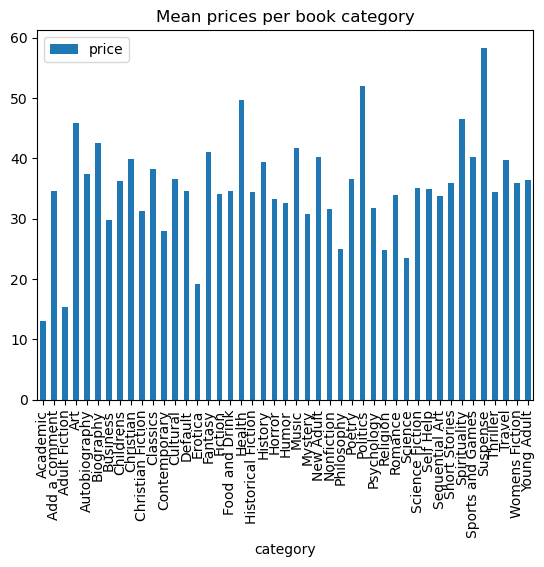

In [59]:
mean_prices.plot.bar(title = "Mean prices per book category")

Unfortunately, this plot is quiet messy and we can not properly compare categories. We should sort the bars descendingly/ascendingly.

<Axes: title={'center': 'Mean prices per book category'}, xlabel='category'>

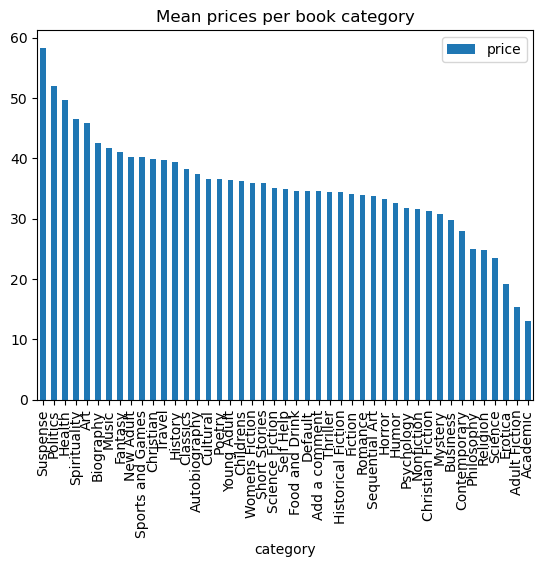

In [60]:
mean_prices.sort_values(by='price', ascending=False).plot.bar(title = "Mean prices per book category")

**Summary: Webscraping - Cookbook**

- Inspect the websites HTML code, that you want to crawl --> where do you find the desired information
- Access URL of the website (using and agent) and store the HTML content
- Format/parse the content into a readable format
- Extract/Filter the desired information and save it into a structured format (like a data frame or dictionary)
- For information displayed on multiple sub-pages of the website, you may need to repeat steps 2–4 to have the complete information


<h3> 6 Exception handeling </h3>


*adapted from: Prof. Dr. Karsten Donnay, Stefan Scholz (see the [github repo](https://github.com/stefan-scholz/python-block-course-2019)) and from the lectures of András Fülöp (see the [github repo](https://github.com/fulibacsi/notebooks/tree/master/lectures/python101))*

Until now you have probably strumbled across several **error messages** when you wrote Python code. In general, these error messages are divided into two categories: 

- First, there are **syntax errors**, which indicate that at some point in your code you used an **invalid command**, e.g. you forgot an indent or wrote a colon too much. The interpreter checks for these syntax errors before you code is actually executed. But we do not want to go into detail here. 
- Instead, we want to discuss the second category of error messages. These error messages are problems which the interpreter encounters when it actually executes your code. These errors are also called **exceptions**. By default, they are **fatal** and stop your program immediately when the exception occurs. 

In the following is a list of common exceptions: 

| Exception | Cause |
| -------- | ------- |
| Attribute Error | Raised when attribute assignment or reference fails |
| Import Error | Raised when the imported module is not found |
| Index Error | Raised when index of a sequence is out of range |
| KeyError | Raised when a key is not found in a dictionary | 
| Keyboard Interrupt | Raised when the user hits interrupt key(Ctrl + C or Delete) |
| Memory Error | Raised when an operation runs out of memory | 
| Name Error | Raised when a variable is not found in local or global scope | 
| Syntax Error | Raised by parser when syntax error is encountered |
| IndentationError | Raised when there is incorrect indentation | 
| Type Error | Raised when a function or operation is applied to an object of incorrect type | 
| Value Error | Raised when a function gets argument of correct type but improper value |
| Zero Division Error | Raised when second operand of division or modulo operation is zero |

If you are working with data streams, e.g. from websites and APIs, it is advisable that you take certain **errors** into **account** such that not the whole program aborts because of an **unimportant detail** in the data stream. Besides the data stream itself, there is an endless number of potential causes for errors. 

In these cases, we wrap our code with a `try` **statement**, and catch a possible **exception** with an `except` statement. You can also catch **multiple exceptions** at the same time by adding underneath more `except` statements. If you want to have the respective **message** of the exception available in the `exception` block give it a **variable name**, like in the `with` statement. If you use a `finally` **statement** at the end of your `try` statement, the **clause** inside the `finally` statement will be **executed last**, whether or not the `try` statement raised an exception. 

Let us **catch** some trivial **exceptions**. 

In [61]:
# error prone code
size = len(w)

NameError: name 'w' is not defined

In [62]:
try:
    # error prone code
    size = len(x)
except NameError as e:
    # report name error
    print(f"Got error: {e}")

Got error: name 'x' is not defined


In [63]:
try: 
    # error prone code
    y = 12
    size = len(y)
except NameError as e:
    # report name error
    print(f"Got name error: {e}")
except TypeError as e:
    # report type error
    print(f"Got type error: {e}")

Got type error: object of type 'int' has no len()


In [64]:
try: 
    # error prone code
    size = len(z)
except NameError as e:
    # report name error
    print(f"Got name error: {e}")
except TypeError as e:
    # report type error
    print(f"Got type error: {e}")
finally:
    # report finished block
    print("Finished try block")

Got name error: name 'z' is not defined
Finished try block


Please keep in mind, however, that you should not **abuse** `try` statements to make **poor code** run, but only to deal with **unavoidable problems**. This is also the reason why we have not introduced exception handling earlier on. 

<h3> 7 Logging </h3>

Sometimes, especially when scraping bigger amouts of data, which takes longer times, it can make sense to keep track of the scraping-process (for example potentially occuring error messages or other issues) by writing a log-book.

In [65]:
## First, the logging-book needs to be set up


logging.basicConfig(filename="logger_temperature.txt",
                    filemode="a",
                    level=logging.INFO,
                    format="%(asctime)s: %(levelname)s: %(message)s")


NameError: name 'logging' is not defined

In [ ]:
## Handling different error messages

try:
    url = "https://www.timeanddate.com/worldclock/" + input_location
except NameError:
    logging.error(f"{NameError.__name__}: The location {input_location} is not in the right format.")


headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0"}
resp = requests.get(url, headers = headers)
soup = BeautifulSoup(resp.content, 'html.parser')

if (resp.status_code == 200):
    logging.info(f'Iteration {i}: Website sucessfully reached.')
else:
    logging.error(f" Iteration{i}: Reaching website failed. Response status {resp_lund.status_code}. Please check the url for mistakes.")  


**Best practices:**

- Only scrape if you are allowed to

- Reduce the load on websited by setting a crawler delay (a waiting time before the next request-iteration)

- Scrape resposibly and efficents (only what you need and keep privacy concerns in mind)

**Add On**

Interested students can further practice using these websites:

- Scrape the data from this [website](https://www.scrapethissite.com/pages/simple/) and create a dataframe with the columns capital, population, area to store the data. URL: https://www.scrapethissite.com/pages/simple/

- Scrape the data from this [website](https://www.scrapethissite.com/pages/forms/) and create a dataframe which contains all the data about all the hockey teams. URL: https://www.scrapethissite.com/pages/forms/